# Livia Zalilla

## Research question/interests

We are interested in exploring the global production of marine fisheries and its effects on climate change through overexploitation of fish stocks within the past 50 years. We will compare the trends of fishing production levels in different countries and regions. Some questions we intend to investigate are: 
- How will commercial fishing be able to meet the demands of fish stock from the increasing global population? 
- How will the results of overfishing impact our wild fish stock over the next decade? 
- What contributions will aquaculture make in sustainable practices of fishing?   

In [1]:
## Importing the dataset

import numpy as np
import pandas as pd

aquaculture = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/capture-fisheries-vs-aquaculture.csv", sep=",")
capturedVsAquaculture= pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/capture-fisheries-vs-aquaculture.csv", sep=",")
captured = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/capture-fishery-production.csv", sep=",")
seafoodConsumptionpercapita = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/fish-and-seafood-consumption-per-capita.csv", sep=",")
sustainableFishStocks = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/fish-stocks-within-sustainable-levels.csv", sep=",")
globalFisheryBySector = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/global-fishery-catch-by-sector.csv", sep=",")
seafoodProduction = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/seafood-and-fish-production-thousand-tonnes.csv", sep=",")


## Task 1: Conduct an Exploratory Data Analysis (EDA) on your dataset
 Importing the EDA Code template

In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import warnings

### Preliminary Data Processing
Import the dataframe 'sustainableFishStocks' --> This dataset is most relevant to the global production of marine fisheries and its effects on climate change through overexploitation of fish stocks. 

In [3]:
df1 = sustainableFishStocks

In [4]:
df1.shape  # return the number of rows by the number of columns for the dataset. total 51 rows and 5 columns. 

(51, 5)

In [5]:
df1.head() # return the first 5 rows of the dataset. 

,Entity,Code,Year,"Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited
0,Eastern Central Atlantic,NaN,2015,57.142860,42.857140
1,Eastern Central Atlantic,NaN,2017,57.142857,42.857143
2,Eastern Central Pacific,NaN,2015,86.666670,13.333330
3,Eastern Central Pacific,NaN,2017,86.666667,13.333333
4,Eastern Indian Ocean,NaN,2015,73.076920,26.923080


In [6]:
df1.columns # returns the name of all the columns in the dataset.

Index(['Entity', 'Code', 'Year',
       'Share of fish stocks within biologically sustainable levels (FAO, 2020)',
       'Share of fish stocks that are overexploited'],
      dtype='object')

In [7]:
df1.nunique(axis=0) # returns the number of unique values for each variable.

Entity                                                                     16
Code                                                                        1
Year                                                                       21
Share of fish stocks within biologically sustainable levels (FAO, 2020)    51
Share of fish stocks that are overexploited                                51
dtype: int64

In [8]:
df1.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))) #summarizes the count, mean, standard deviation, min, and max for numeric variables.

,Year,"Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited
count,51.000000,51.000000,51.000000
mean,2007.705882,70.521579,29.478421
std,13.150352,13.885635,13.885635
min,1974.000000,37.500000,8.536585
25%,2002.000000,66.257862,18.156843
50%,2015.000000,73.076920,26.923080
75%,2017.000000,81.843157,33.742138
max,2017.000000,91.463415,62.500000


In [9]:
df1.Code.unique() # returns the number of unique values for each variable.                 

array([nan, 'OWID_WRL'], dtype=object)

We can see that the variable 'Code' in our dataset contains the country codes 'NaN' or 'OWID_WRL'. This does not provided us enough information of the location and can be discarded in Task 2. Instead we will use the variable 'Entity' to provide information about the location. 

We will compare the two variables 'Share of fish stocks within biologically sustainable levels' and 'Share of fish stocks that are overexploited' to gain insight about their correlation in different regions throughout the years. 

<AxesSubplot:>

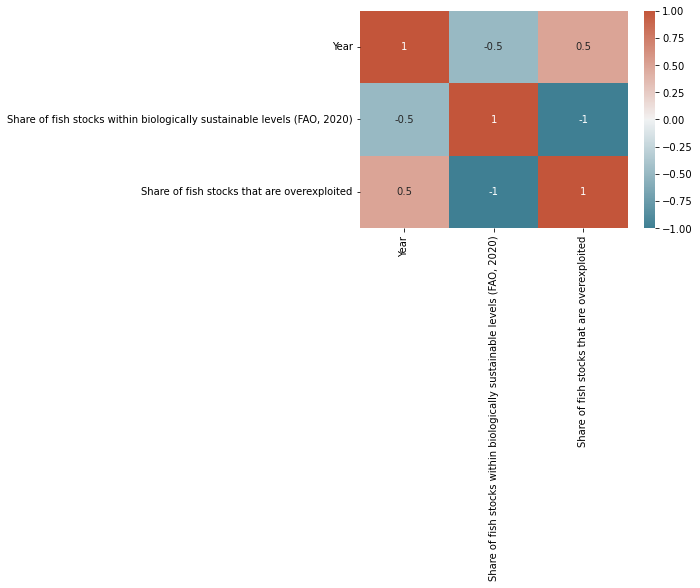

In [10]:
corr = df1.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='Year', ylabel='Share of fish stocks within biologically sustainable levels (FAO, 2020)'>

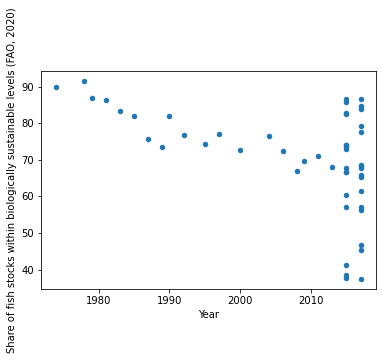

In [11]:
df1.plot(kind='scatter', x='Year', y='Share of fish stocks within biologically sustainable levels (FAO, 2020)')

<AxesSubplot:xlabel='Year', ylabel='Share of fish stocks that are overexploited'>

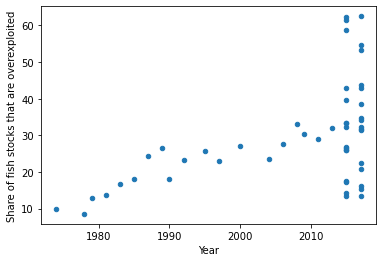

In [12]:
df1.plot(kind='scatter', x='Year', y='Share of fish stocks that are overexploited')

We can see that the overexploited stock has a positive correlation with year, while the sustainable source of fish has a negative correlation with year. This means that with every year, fish stock shares are increasingly overexploited within these regions and the share of fish stocks at biologically sustainable levels decrease.

## Task 2: Set up an “Analysis Pipeline”


### Clean Data

In [13]:
df1_cleaned = df1.copy().drop(['Code'], axis=1) # removing 'Code' variable
df1_cleaned.head()

,Entity,Year,"Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited
0,Eastern Central Atlantic,2015,57.142860,42.857140
1,Eastern Central Atlantic,2017,57.142857,42.857143
2,Eastern Central Pacific,2015,86.666670,13.333330
3,Eastern Central Pacific,2017,86.666667,13.333333
4,Eastern Indian Ocean,2015,73.076920,26.923080


In [14]:
df2 = capturedVsAquaculture 
df2_cleaned = df2.copy().drop(['Aquaculture production (metric tons)'], axis=1) # removing 'Aquaculture production (metric tons)' variable
df2_cleaned.head()

,Entity,Code,Year,Capture fisheries production (metric tons)
0,Afghanistan,AFG,1969,400.0
1,Afghanistan,AFG,1970,400.0
2,Afghanistan,AFG,1971,500.0
3,Afghanistan,AFG,1972,500.0
4,Afghanistan,AFG,1973,500.0


In [15]:
df3 = seafoodConsumptionpercapita 
df3.head()

,Entity,Code,Year,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,Afghanistan,AFG,1961,0.03
1,Afghanistan,AFG,1962,0.03
2,Afghanistan,AFG,1963,0.03
3,Afghanistan,AFG,1964,0.03
4,Afghanistan,AFG,1965,0.03


In [16]:
df4 = globalFisheryBySector
df4_cleaned = df4.copy().drop(['Entity','Code', 'Artisanal (small-scale commercial)', 'Discards', 'Recreational', 'Subsistence'], axis=1)
df4_cleaned.head()

,Year,Industrial (large-scale commercial)
0,1950,14566338
1,1951,15417937
2,1952,16463942
3,1953,17163789
4,1954,18340199


In [17]:
df5 = seafoodProduction
df5_cleaned = df5.copy().drop([
       'Commodity Balances - Livestock and Fish Primary Equivalent - Pelagic Fish - 2763 - Production - 5510 - tonnes',
       'Commodity Balances - Livestock and Fish Primary Equivalent - Crustaceans - 2765 - Production - 5510 - tonnes',
       'Commodity Balances - Livestock and Fish Primary Equivalent - Cephalopods - 2766 - Production - 5510 - tonnes',
       'Commodity Balances - Livestock and Fish Primary Equivalent - Demersal Fish - 2762 - Production - 5510 - tonnes',
       'Commodity Balances - Livestock and Fish Primary Equivalent - Molluscs, Other - 2767 - Production - 5510 - tonnes',
       'Commodity Balances - Livestock and Fish Primary Equivalent - Marine Fish, Other - 2764 - Production - 5510 - tonnes'], axis=1)
df5_cleaned.head()

,Entity,Code,Year,Commodity Balances - Livestock and Fish Primary Equivalent - Freshwater Fish - 2761 - Production - 5510 - tonnes
0,Afghanistan,AFG,1961,300.0
1,Afghanistan,AFG,1962,300.0
2,Afghanistan,AFG,1963,300.0
3,Afghanistan,AFG,1964,300.0
4,Afghanistan,AFG,1965,300.0


### Wrangling/Joining Dataframes

In [23]:
# Merging all our existing dataset all together

from functools import reduce

# define list of DataFrames
dfs = [df1_cleaned, df2_cleaned, df3, df4_cleaned, df5_cleaned]

# merge all DataFrames into one

combined_df = reduce(lambda left,right: pd.merge(left,right,how='outer'), dfs)

# a preview of the combined_df
combined_df.head()

,Entity,Year,"Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited,Code,Capture fisheries production (metric tons),"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)",Industrial (large-scale commercial),Commodity Balances - Livestock and Fish Primary Equivalent - Freshwater Fish - 2761 - Production - 5510 - tonnes
0,Eastern Central Atlantic,2015,57.14286,42.85714,NaN,NaN,NaN,NaN,NaN
1,Eastern Central Pacific,2015,86.66667,13.33333,NaN,NaN,NaN,NaN,NaN
2,Eastern Indian Ocean,2015,73.07692,26.92308,NaN,NaN,NaN,NaN,NaN
3,Mediterranean and Black Sea,2015,37.83784,62.16216,NaN,NaN,NaN,NaN,NaN
4,Northeast Central Atlantic,2015,73.46939,26.53061,NaN,NaN,NaN,NaN,NaN


In [30]:
cleaned_df = combined_df.copy().drop(['Code'], axis=1)
cleaned_df.head()

,Entity,Year,"Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited,Capture fisheries production (metric tons),"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)",Industrial (large-scale commercial),Commodity Balances - Livestock and Fish Primary Equivalent - Freshwater Fish - 2761 - Production - 5510 - tonnes
0,Eastern Central Atlantic,2015,57.14286,42.85714,NaN,NaN,NaN,NaN
1,Eastern Central Pacific,2015,86.66667,13.33333,NaN,NaN,NaN,NaN
2,Eastern Indian Ocean,2015,73.07692,26.92308,NaN,NaN,NaN,NaN
3,Mediterranean and Black Sea,2015,37.83784,62.16216,NaN,NaN,NaN,NaN
4,Northeast Central Atlantic,2015,73.46939,26.53061,NaN,NaN,NaN,NaN


In [29]:
df = cleaned_df.rename(columns={'Share of fish stocks within biologically sustainable levels (FAO, 2020)': 'Fish stocks within biologically sustainable levels', 'Share of fish stocks that are overexploited': 'Overexploited fish stocks'})
df = df.rename(columns={'Capture fisheries production (metric tons)': 'Capture fisheries production'})
df = df.rename(columns={'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)' : 'Fish, Seafood- Food supply quantity'})
df = df.rename(columns={'Commodity Balances - Livestock and Fish Primary Equivalent - Freshwater Fish - 2761 - Production - 5510 - tonnes' : 'Livestock and Fish Primary Equivalent - Freshwater Fish'})
df.head()


,Entity,Year,Fish stocks within biologically sustainable levels,Overexploited fish stocks,Capture fisheries production,"Fish, Seafood- Food supply quantity",Industrial (large-scale commercial),Livestock and Fish Primary Equivalent - Freshwater Fish
0,Eastern Central Atlantic,2015,57.14286,42.85714,NaN,NaN,NaN,NaN
1,Eastern Central Pacific,2015,86.66667,13.33333,NaN,NaN,NaN,NaN
2,Eastern Indian Ocean,2015,73.07692,26.92308,NaN,NaN,NaN,NaN
3,Mediterranean and Black Sea,2015,37.83784,62.16216,NaN,NaN,NaN,NaN
4,Northeast Central Atlantic,2015,73.46939,26.53061,NaN,NaN,NaN,NaN


## Task 3. Method Chaining and writing Python programs

In [ ]:
import project_functions_livia as pl

# Export merged table
combined_df.to_csv('../data/processed/combined_livia.csv', index=False)

In [31]:
cleaned_dataset = pl.load_and_process("../data/processed/combined_livia.csv")
cleaned_dataset

# The result:

,Entity,Year,Fish stocks within biologically sustainable levels,Overexploited fish stocks,Capture fisheries production,"Fish, Seafood- Food supply quantity",Industrial (large-scale commercial),Livestock and Fish Primary Equivalent - Freshwater Fish
0,Eastern Central Atlantic,2015,57.14286,42.85714,NaN,NaN,NaN,NaN
1,Eastern Central Pacific,2015,86.66667,13.33333,NaN,NaN,NaN,NaN
2,Eastern Indian Ocean,2015,73.07692,26.92308,NaN,NaN,NaN,NaN
3,Mediterranean and Black Sea,2015,37.83784,62.16216,NaN,NaN,NaN,NaN
4,Northeast Central Atlantic,2015,73.46939,26.53061,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
16719,NaN,1955,NaN,NaN,NaN,NaN,18728089.0,NaN
16720,NaN,1956,NaN,NaN,NaN,NaN,19902604.0,NaN
16721,NaN,1957,NaN,NaN,NaN,NaN,20030089.0,NaN
16722,NaN,1958,NaN,NaN,NaN,NaN,20520801.0,NaN
